In [ ]:
import pandas as pd
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.patches as mpatches
import numpy as np
import ipywidgets as widgets
import re
import ast
from scipy.stats import gaussian_kde

In [ ]:
df = pd.read_csv('Repo_Messages_Huge_Set.csv')

In [ ]:
print(df.shape)
print('Size of dataframe: {} Bytes'.format(int(df.memory_usage(index=True, deep=True).sum())))
print(df.head())

In [42]:
# Interactive search bar
selected_repo = ""

In [93]:
# Gather data
formats_valid = ["feat", "fix", "refactor", "perf", "style", "test", "docs", "build", "ops", "chore", "other"]
formats_count = dict(zip(formats_valid, [0]*len(formats_valid)))

author_buckets = 20
author_adherence = {} # Author name : [adhered, max]
author_adherence_ratio = [0]*author_buckets

for index, row in df.iterrows():
    if type(row['message']) == float:
        continue
    if pd.isnull(row["author"]):
        continue
    
    author_name = ast.literal_eval(row['author'])["name"]
    
    if author_name not in author_adherence:
        author_adherence[author_name] = [0, 0]
    
    if selected_repo == "" or selected_repo == row["repo"]:
        commit_fmt = row["message"].split(": ", 1)
        # If a split was made
        if len(commit_fmt) > 1:
            author_adherence[author_name][0] += 1
            author_adherence[author_name][1] += 1
            
            if commit_fmt[0] in formats_valid:
                formats_count[commit_fmt[0]] += 1
            else:
                formats_count["other"] += 1
                
        author_adherence[author_name][1] += 1



TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [106]:
for val in author_adherence.values():
    ratio = val[0] / val[1]
    index = int(ratio * author_buckets)
    author_adherence_ratio[index] += 1
    
print(formats_count)
print(author_adherence)
print(author_adherence_ratio)

{'feat': 71865, 'fix': 117215, 'refactor': 32281, 'perf': 1899, 'style': 5965, 'test': 16938, 'docs': 43864, 'build': 17432, 'ops': 42, 'chore': 137784, 'other': 2021888}
{'Klemens Nanni': [68, 139], 'Henrique Gomide': [0, 215], 'Jamie McClymont': [43, 86], 'hdhog': [2, 4], 'adisbladis': [1220, 2472], 'Henrik Jonsson': [15, 30], 'KFears': [15, 30], 'Alexander Bantyev': [122, 245], 'Ilya Fedin': [40, 886], 'henriquepgomide': [0, 206], 'Alexey Naydenov': [0, 142], 'Aidan Gauland': [21, 42], 'Pooya Moradi': [25, 50], 'Andrey Kuznetsov': [133, 280], 'bhovhannes': [26, 103], 'Timur Demin': [5, 10], 'Utku Demir': [29, 62], 'Hugo Reeves': [16, 34], 'Cabia Rangris': [11, 22], 'Les Vogel': [22, 147], '"Andrey Kuznetsov"': [62, 124], 'coagulant': [0, 69], 'Bernardo Meurer': [1368, 2927], 'Shahrukh Khan': [6, 12], 'Nikolay Korotkiy': [609, 1226], 'Yuriy Taraday': [12, 27], 'Ilya Baryshev': [1, 74], 'Andreas Rammhold': [574, 1162], 'Hovhannes Babayan': [1543, 3991], 'Binur Konarbai': [2, 13], 'Bin

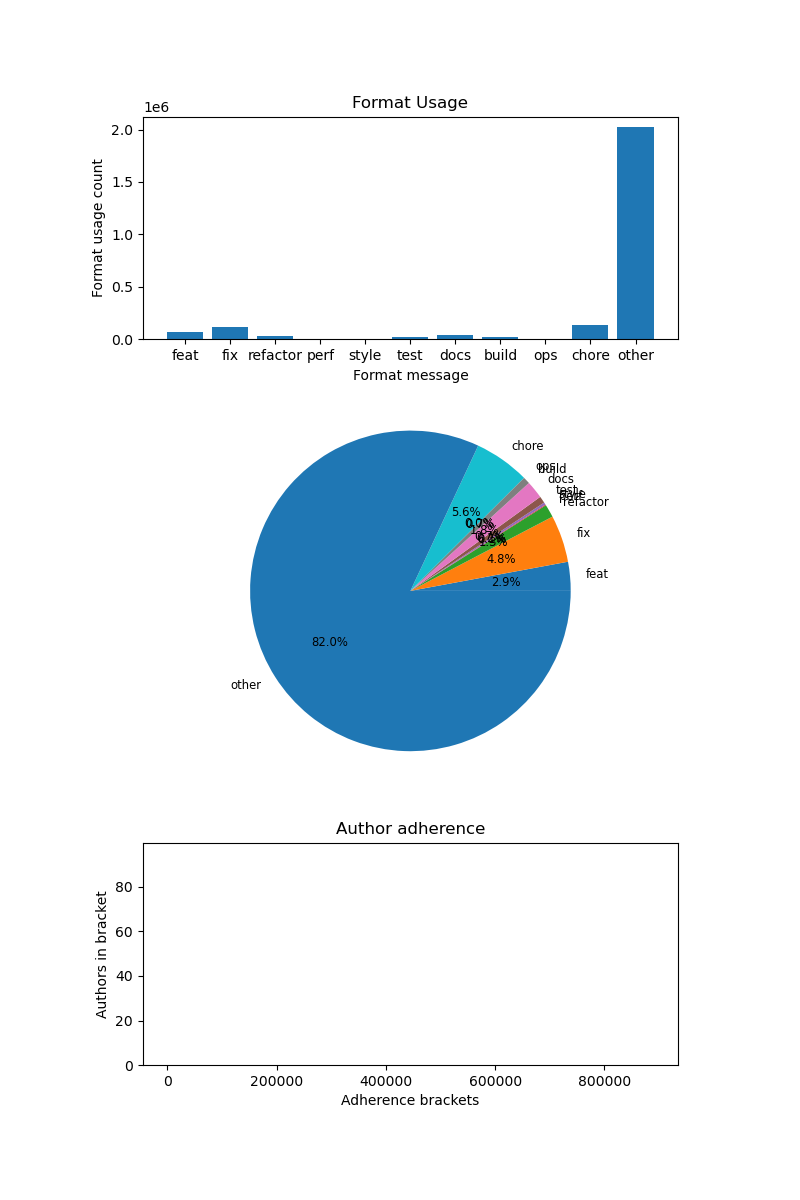

In [110]:
# Subgraph
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
fig.tight_layout(pad=8)

ax1.bar(formats_valid, formats_count.values())
ax1.set_ylabel("Format usage count")
ax1.set_xlabel("Format message")
ax1.set_title("Format Usage")


ax2.pie(formats_count.values(), labels=formats_valid, autopct="%1.1f%%", textprops={'size': 'smaller'}, radius=1.8)

ax3.hist(author_adherence_ratio, bins=author_buckets)
ax3.set_ylabel("Authors in bracket")
ax3.set_xlabel("Adherence brackets")
ax3.set_title("Author adherence")

plt.show()

In [ ]:
repoIndecies = {}
totalMessages = []
formatMessages = []
languageIndecies = {}
languageCounts = []
languageNames = []
biggestLanguages = []
authors = []
    
messages = df.shape
repos = 0
languages = 0
for index, row in df.iterrows():
    if not row['repo'] in repoIndecies:
        repoIndecies[row['repo']] = repos
        totalMessages.append(0)
        formatMessages.append(0)

        biggestLanguages.append(0)
        maxBytes = 0
        maxLanguage = ''
        if type(row['language']) != float:
            for language in ast.literal_eval(row['language']):
                if language['bytes'] > maxBytes:
                    maxBytes = language['bytes']
                    maxLanguage = language['name']
            if not maxLanguage in languageIndecies:
                languageIndecies[maxLanguage] = languages
                languageCounts.append(0)
                languageNames.append(maxLanguage)
                languages += 1
            biggestLanguages[repos] = languageIndecies[maxLanguage]
            languageCounts[languageIndecies[maxLanguage]] += 1
        else:
            for language in [{'name': 'nan', 'bytes': 1}]:
                if language['bytes'] > maxBytes:
                    maxBytes = language['bytes']
                    maxLanguage = language['name']
            if not maxLanguage in languageIndecies:
                languageIndecies[maxLanguage] = languages
                languageCounts.append(0)
                languageNames.append(maxLanguage)
                languages += 1
            biggestLanguages[repos] = languageIndecies[maxLanguage]
            languageCounts[languageIndecies[maxLanguage]] += 1

        authors.append({})
        repos += 1

    repoIndex = repoIndecies[row['repo']]
    totalMessages[repoIndex] += 1
    if type(row['message']) != float and re.search('^((feat)|(fix)|(refactor)|(perf)|(style)|(test)|(docs)|(build)|(ops)|(chore))([(].*[)])?!?: .*$', row['message']):
        formatMessages[repoIndex] += 1
    
    if (type(row['author']) != float):
        author = ast.literal_eval(row['author'])
        if not author['name'] in authors[repoIndex]:
            authors[repoIndex][author['name']] = 0
        authors[repoIndex][author['name']] += 1 #messages per author

messageRatios = []
authorCounts = []
for i in range(repos):
    messageRatios.append(formatMessages[i]/totalMessages[i])
    authorCounts.append(len(authors[i]))

In [ ]:
DisplayedLanguages = 10
languageValues = [0]
languageLabels = ['Other']
languageSorter = np.array(languageCounts).argsort()
for i, j in enumerate(languageSorter[-DisplayedLanguages:]):
    if languageNames[j] == '':
        for k in range(i + 1):
            temp = languageSorter[-10 + i - k]
            languageSorter[-10 + i - k] = languageSorter[-10 + i - k - 1]
            languageSorter[-10 + i - k - 1] = temp

reverseSorter = []
for i in range(len(languageSorter)):
    reverseSorter.append(0)
for i, j in enumerate(languageSorter):
    reverseSorter[j] = i
languageRatios = []
for i in range(DisplayedLanguages + 1):
    languageRatios.append([])

for i in languageSorter[:-DisplayedLanguages]:
    languageValues[0] += languageCounts[i]
for i in languageSorter[-DisplayedLanguages:]:
    languageValues.append(languageCounts[i])
    languageLabels.append(languageNames[i])
for i in range(repos):
    if reverseSorter[biggestLanguages[i]] < (languages - DisplayedLanguages):
        languageRatios[0].append(messageRatios[i])
    else:
        languageRatios[reverseSorter[biggestLanguages[i]] - (languages - DisplayedLanguages) + 1].append(messageRatios[i])
print(languageLabels)
print(languageValues)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8.5, 5.8), gridspec_kw={'width_ratios': [4, 3],
                                                                                 'height_ratios': [1.5,3.8],
                                                                                 'wspace': 0.1,
                                                                                 'hspace': 0.1})

ax2.axis('off')
ax1.set_xticks([])
ax4.set_yticks([])

yaxis = totalMessages
xy = np.vstack([messageRatios, yaxis])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = np.array(messageRatios)[idx], np.array(yaxis)[idx], z[idx]

ax3.scatter(x, y, c=z, s=20, cmap=colormaps['jet'], label='Repositories')

ylim = ax3.get_ylim()

ax3.set(ylabel='Total Messages', xlabel='Format Adherence')

ax1.hist(messageRatios, 50, color='navy')
ax1.set(ylabel='Repos')

ax4.hist(totalMessages, 50, orientation='horizontal', color='navy')
ax4.set(xlabel='Repos')

fig.suptitle('Open Source Repositories Adherence to "Conventional Commit Messages" format')
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.toolbar_visible = False
fig.canvas.resizable = False

def f2(scale):
    ax3.set_ylim([ylim[0] * scale / ylim[1], scale])

    ax4.clear()
    ax4.hist(list(filter(lambda x: x < scale, yaxis)), 50, orientation='horizontal', color='navy')
    ax4.set_ylim([ylim[0] * scale / ylim[1], scale])
    ax4.set_yticks([])
    ax4.set(xlabel='Repos')

scaleSlider = widgets.IntSlider( value=ylim[1],
                                    min=10,
                                    max=ylim[1],
                                    step=1,
                                    description='Y Upper Limit:',
                                    disabled=False,
                                    continuous_update=False,
                                    orientation='horizontal',
                                    readout=True,
                                    readout_format='d',
                                    layout=widgets.Layout(width='70%'))
widgets.interact(f2, scale=scaleSlider)

def f(mode):
    if mode == 'Total Messages':
        yaxis = totalMessages
        scaleSlider.disabled = False
    elif mode == 'Contributors':
        yaxis = authorCounts
        scaleSlider.disabled = False
    elif mode == 'Biggest Language':
        ax3.clear()
        for i, xaxis in enumerate(languageRatios):
            xy = np.vstack([xaxis])
            z = gaussian_kde(xy)(xy)

            idx = z.argsort()
            x, z = np.array(xaxis)[idx], z[idx]
            ax3.scatter(x, [i]*len(xaxis), c=z, s=20, cmap=colormaps['jet'], label='Repositories')
            ax3.set_yticks(range(DisplayedLanguages + 1), labels=languageLabels)
        ax3.set(ylabel=mode, xlabel='Format Adherence')

        ax4.clear()
        ax4.barh(np.arange(DisplayedLanguages + 1), languageValues, 0.3, color='navy')
        ax4.set_ylim(ax3.get_ylim())
        ax4.set_yticks([])
        ax4.set(xlabel='Repos')

        scaleSlider.disabled = True
        return

    xy = np.vstack([messageRatios, yaxis])
    z = gaussian_kde(xy)(xy)

    idx = z.argsort()
    x, y, z = np.array(messageRatios)[idx], np.array(yaxis)[idx], z[idx]
    ax3.clear()
    ax3.scatter(x, y, c=z, s=20, cmap=colormaps['jet'], label='Repositories')
    ax3.set(ylabel=mode, xlabel='Format Adherence')

    ylim = ax3.get_ylim()
    scaleSlider.value = ylim[1]
    scaleSlider.max = ylim[1]

    ax4.clear()
    ax4.hist(yaxis, 50, orientation='horizontal', color='navy')
    ax4.set_yticks([])
    ax4.set(xlabel='Repos')
    

widgets.interact(f, mode=widgets.Dropdown( options=['Total Messages', 'Contributors', 'Biggest Language'],
                                                value='Total Messages',
                                                description='Y axis:',
                                                style={'description_width': 'initial'},
                                                layout=widgets.Layout(width='30%') ))